# SIMPLE LOGISTIC REGRESSION FROM SCRATCH USING IRIS DATASET
Thanks to https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f
Thanks to https://www.ritchieng.com/logistic-regression/
Thanks to https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score

In [2]:
cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris=pd.read_csv('C:\\Users\\sagar\\Downloads\\iris.data',names=cols)

#### Tagging the classes to numbers for calculation sake

In [3]:
cleanup={"class": {"Iris-setosa":0 ,"Iris-versicolor":1,"Iris-virginica":2 }}
iris.replace(cleanup,inplace=True)

#### considering only two classes(100 data points out of 150) for this example
mixing the data as the data is quite aligned and seggregated in ascending order of classes

In [4]:
iris_final=iris[iris['class'] !=2 ]
iris_final = iris_final.sample(frac=1).reset_index(drop=True)

In [5]:
X=iris_final[['sepal_length', 'sepal_width']]
y=iris_final['class']

In [6]:
X=np.array(X)

In [7]:
y=np.array(y)

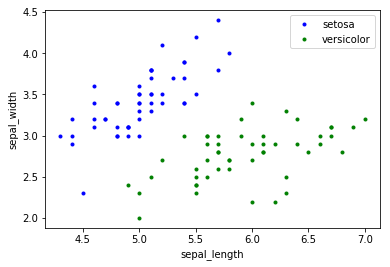

In [8]:
plt.plot(iris_final.loc[iris_final['class']==0,'sepal_length'],iris_final.loc[iris_final['class']==0,'sepal_width'],'b.')
plt.plot(iris_final.loc[iris_final['class']==1,'sepal_length'],iris_final.loc[iris_final['class']==1,'sepal_width'],'g.')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(['setosa','versicolor'])
plt.show()

out of two possible outcomes, we use sepal_length and sepal_width as inputs and try to predict the class

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((75, 2), (25, 2), (75,), (25,))

#### y arrays have to reshaped so they can be used for matrix operations in further steps

In [10]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((75, 2), (25, 2), (75, 1), (25, 1))

In [12]:
def sigmoid(z):
    return 1/(1+np.e**-z)

#### this is loss at every instance. The difference between actual and predicted

In [13]:
def logistic_loss(y,y_hat):
    return -np.mean(y * np.log(y_hat) + (1-y)* np.log(1-y_hat))

#### Intializing the weights to zeros. Weights will be 2*1 matrix as we have two inputs and b will
#### 1*1 matrix as it is a constant

In [14]:
W=np.zeros((2,1))
b=np.zeros((1,1))
learning_rate=0.01

## Gradient descent logic

In [15]:
m=len(y_train) 
for epoch in range(5000):
    Z = np.matmul(X_train,W) + b #matrix multiplication will produce linear result with initial W value
    A = sigmoid(Z) #this produces estimated 'y' with weights
    loss = logistic_loss(y_train,A)  #this is loss, this is only printed in the end to see if the loss is getting reduced or not
    dz = A - y_train #difference between each estimation and actual value
    dw = 1/m * np.matmul(X_train.T, dz) #creating new weight based on all records(.T)represent matrix transform
    db = np.sum(dz) #summation of all the differences to reset the weights
    W = W - learning_rate * dw #adjusting the weights using the learning rate(LR). Its a hyper parameter
    b = b - learning_rate * db #adjusting the intercept
    
    if epoch % 100  == 0:
        print(loss)

0.6931471805599454
0.6213062716367733
0.5617311394407674
0.5118533744776064
0.469804132557481
0.43407346189114027
0.40346041210522454
0.37701629567499123
0.3539924322916052
0.33379634595087854
0.3159567855040378
0.30009649857861653
0.28591130936783876
0.27315412201022926
0.2616226936561527
0.2511502637737217
0.24159833976737743
0.23285111109206838
0.2248110967872313
0.21739573137975493
0.2105346685840712
0.20416763739525126
0.1982427259902797
0.19271499910280093
0.18754537702808155
0.1826997212115408
0.17814808398227208
0.17386408950975987
0.1698244202872302
0.16600838896313236
0.16239757958162693
0.15897554556921978
0.15572755435142963
0.15264037047431767
0.1497020706708398
0.14690188554903144
0.14423006356190834
0.14167775370386898
0.13923690400828265
0.13690017342884356
0.13466085509869552
0.13251280929606946
0.13045040471870414
0.12846846689374186
0.12656223273466433
0.1247273104097125
0.1229596438131256
0.1212554810362327
0.11961134632378065
0.11802401507498257


### predicting and checking how our algorithm works for train data

In [16]:
preds=[]
for i in sigmoid(Z):
    if i>0.5:
        preds.append(1)
    else:
        preds.append(0)

In [17]:
print(preds)

[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]


In [18]:
f1_score(preds,y_train)

1.0

### predicting y_test using X_test as input with the weights obtained in the above gradient descent

In [19]:
Z_test=np.matmul(X_test,W) + b


##### segregating according the probabilities

In [20]:
test_preds=[]
for i in sigmoid(Z_test):
    if i>0.5:
        test_preds.append(1)
    else:
        test_preds.append(0)

In [21]:
test_preds

[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]

#### creating scatter plot and checking if we are able to segregate based on the data

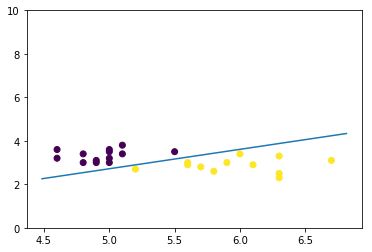

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test.ravel())
ax=plt.gca()
xvals=np.array(ax.get_xlim()).reshape(-1,1)
yvals=-(xvals* W[0][0]+b)/W[1][0]
plt.plot(xvals,yvals)
plt.ylim(0,10)
plt.show()

## We are able to seggregate the classes pretty well. Though this might not help us with another test
## dataset, we are good to showcase how logistic regression works from scratch